# Многомерные массивы

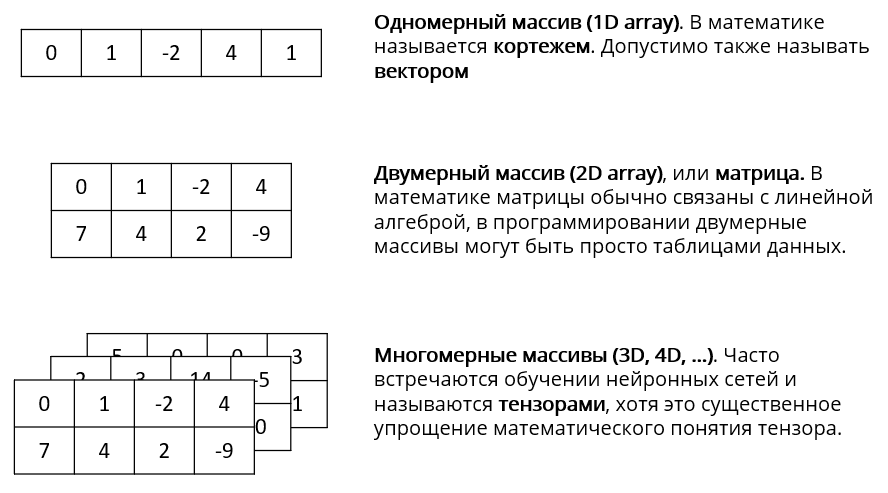

**Форма (shape)** - это последовательность чисел (кортеж из чисел), где каждое число означает размер массива по одной из осей.

Например таким образом мы можем создать массив из нулей размером 10x20x30:

In [ ]:
import numpy as np
array = np.zeros((10, 20, 30))
array.shape

(10, 20, 30)

Единственным аргументом функции np.zeros является кортеж из трех чисел, поэтому используются двойные скобки.

Операция **`len()`** возвращает размер по первой оси, то есть **`len(array)`** эквивалентно **`array.shape[0]`**

In [ ]:
len(array)

10

# Создание многомерных массивов в numpy

In [ ]:
#@title Способы создания массивов

%%html
<style>
    p, table {
        font-size: 18px;
    }
</style>

<table width="90%" border=1>

<tr>
<th width="20%" style="text-align:left">Операция</th>
<th width="50%" style="text-align:left">Пояснение</th>
<th width="30%" style="text-align:left">Пример</th>
</tr>

<tr>
<td>np.array(list)</td>
<td>Создание массива из списка, последовательности и некоторых других объектов, которые могут быть преобразованы в массив (например, PIL-изображения, пока их не рассматриваем)</td>
<td>np.array([[1, 2], [3, 4]])</td>
</tr>

<tr>
<td>np.zeros(size)</td>
<td>Создание массива из нулей</td>
<td>np.zeros((5, 5, 5))</td>
</tr>

<tr>
<td>np.ones(size)</td>
<td>Создание массива из единиц</td>
<td>np.ones((5, 5, 5))<br/>(аналогично np.zeros((5, 5, 5)) + 1)</td>
</tr>

<tr>
<td>np.random.rand(*size)</td>
<td>Создание массива из cлучайных чисел от 0 до 1</td>
<td>np.random.rand(5, 5, 5)</td>
</tr>

<tr>
<td>np.random.uniform(A, B, size)</td>
<td>Создание массива из cлучайных float-чисел от A до B размера size</td>
<td>np.random.uniform(-100, 100, (5, 5, 5))</td>
</tr>

<tr>
<td>np.random.normal(size=size)</td>
<td>Создание массива из нормально распределенных случайных значений</td>
<td>np.random.normal(size=(5, 5, 5))</td>
</tr>

<tr>
<td>np.random.randint(A, B, size)</td>
<td>Создание массива из случайных целых чисел от A включительно до B невключительно размера size</td>
<td>np.random.randint(0, 1000, (5, 5, 5))</td>
</tr>

</table>

In [ ]:
shape = (2, 3, 4)
np.random.rand(*shape)

*   Сколько элементов в массиве размером (1, 1, 1, 1)?
*   В чем может быть смысл оси размером 1? Например: (10, 1, 10)
*   Если одно изображение хранится в numpy-массиве, то сколько у него изменений?

Рассмотрим практический пример многомерного массива.

Нейронные сети часто создаются для анализа изображений. В этом случае входные  данные нейронной сети – это массивы изображений. Предположим, что numpy-массив изображений хранится в переменной **`images`**, и  значение **`images.shape`** равно **`(64, 640, 480, 3)`**, а тип массива – **`uint8`**. Это означает следующее:

*  В массиве 64 изображения.
*  Изображения имеют размер 640x480.
*  Каждый пиксель имеет 3 цветовых канала (RGB: красный, зеленый, синий).
*  Всего в массиве 64x640x480x3 = 58982400 чисел.
*  Тип uint8 занимает 1 байт.
*  Всего массив занимает 58982400 байт.


# Начало работы с изображениями

Загрузим изображения размера 32х32 из датасета MNIST.

In [ ]:
import keras
(X, y), (X_test, y_test) = keras.datasets.mnist.load_data()

В массиве X содержится 60000 изображений размером 28х28.

Изображения принадлежат 10 классам. Номер класса - это номер нарисованной на изображении рукописной цифры.

In [ ]:
print(X.shape, X.dtype)

(60000, 28, 28) uint8


В массиве y содержится 60000 чисел от 0 до 9 - номера классов.

**`y[i]`** - номер класса изображения **`X[i]`**.

In [ ]:
print(y.shape, y.dtype)

(60000,) uint8


# Функция imshow

Функция **`imshow`** позволяет нарисовать изображение:

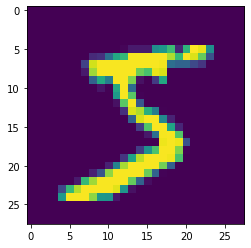

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0]);

**Рисование изображений с 1 цветовым каналом**

В функцию **`imshow`** нужно передать двумерный массив данных размером (высота, ширина).

В рисовании изображений с 1 каналом ключевыми являются понятия *цветовой схемы*, *минимального и максимального значения*.

**Цветовая схема** - это правило преобразования числового значения в цвет. Цвета сопоставляются всем числам от минимальной до максимальной границы.

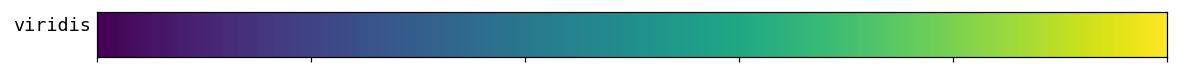

По умолчанию используется цветовая схема 'viridis': фиолетовым обозначается минимальное значение, желтым максимальное значение. Можно также использовать цветовую схему 'gray' (параметр **`cmap`**).

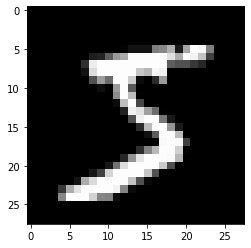

In [ ]:
plt.imshow(X[0], cmap='gray')

Использование цветовой схемы требует задания минимального и максимального значения. 
*   Если изображение передано в формате uint8: минимальное значение 0, максимальное 255.
*   Если изображение передано в формате float: минимальное значение 0, максимальное 1.
*   Можно явно задать минимальное и максимальное значение параметрами vmin, vmax.

**Рисование изображений с 3 цветовыми каналами**

В функцию imshow передается трехмерный массив размером (высота, ширина, 3), где последняя ось означает цветовой канал RGB:
*   Индекс 0 - красный цвет (R)
*   Индекс 1 - синий цвет (G)
*   Индекс 2 - зеленый цвет (B)

In [ ]:
from PIL import Image
import requests

url = 'https://storage.googleapis.com/oleg-zyablov/skillfactory/webinars/car.jpg'
img = np.array(Image.open(requests.get(url, stream=True).raw))
print(img.shape, img.dtype)

(960, 960, 3) uint8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


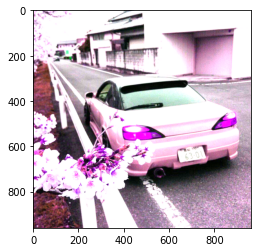

In [ ]:
plt.imshow(np.int64);

К цветным изображениям применяются те же правила:
*   Если изображение передано в формате integer: минимальное значение 0, максимальное 255.
*   Если изображение передано в формате float: минимальное значение 0, максимальное 1.

# Индексация массивов числами и срезами

Загрузим изображения из датасета CIFAR10.

В этом датасете тоже 10 классов, но изображения цветные и имеют размер 32х32.

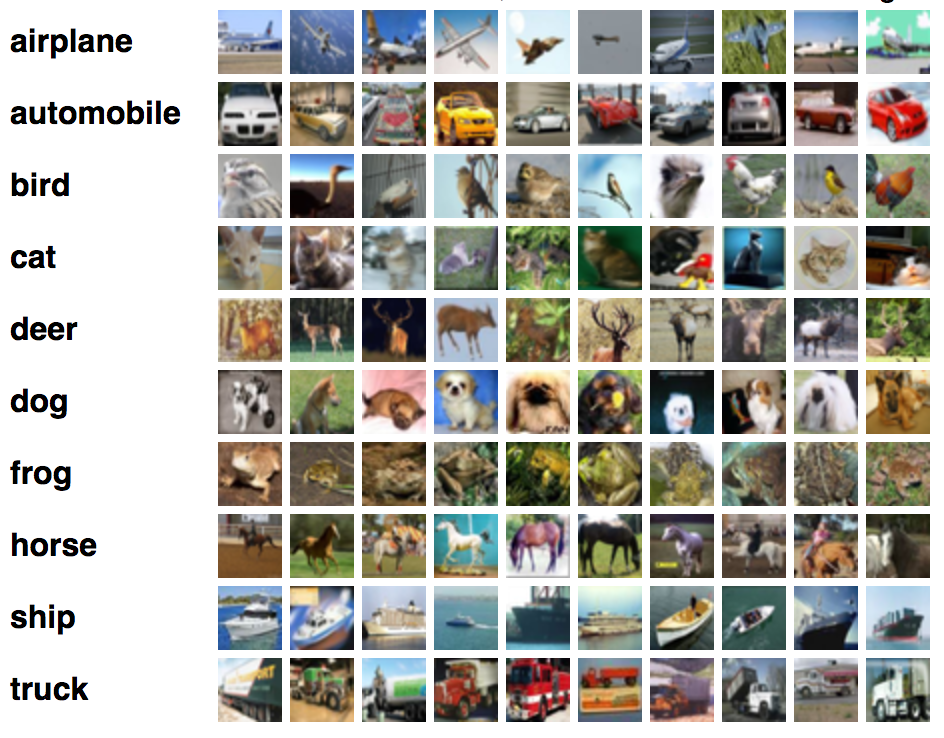

In [ ]:
import keras
(X, y), (X_test, y_test) = keras.datasets.cifar10.load_data()
X.shape

170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

Рассмотрим правила индексации числом.

В квадратных скобках через запятую перечисляется индекс по каждой оси.

*   Число означает взятие элемента, при этом данной оси в результате больше не будет
*   Двоеточие означает взятие всех элементов по данной оси.

In [ ]:
#@title Индексация с помощью чисел

%%html
<style>
    p, table {
        font-size: 18px;
    }
</style>

<table width="75%" border=1>

<tr>
<th width="15%" style="text-align:left">Операция</th>
<th width="67%" style="text-align:left">Пояснение</th>
<th width="18%" style="text-align:left">Форма полученного массива</th>
</tr>

<tr>
<td>X[1]</td>
<td>Взятие второго изображения. Указываем только индекс по первой оси. Неявно предполагается, что по все остальным осям мы берем все элементы.</td>
<td>(32, 32, 3)</td>
</tr>

<tr>
<td>X[1, :]</td>
<td>Взятие второго изображения. Указываем индекс по первой и второй оси.</td>
<td>(32, 32, 3)</td>
</tr>

<tr>
<td>X[1, :, :, :]</td>
<td>Взятие второго изображения. Указываем индекс по всем осям.</td>
<td>(32, 32, 3)</td>
</tr>

<tr>
<td>X[1, ...]</td>
<td>Последовательность двоеточий можно заменять многоточием (ellipsis).</td>
<td>(32, 32, 3)</td>
</tr>

<tr>
<td>X[-1]</td>
<td>Взятие последнего изображения. Индексация отрицательным числом осуществляется с конца.</td>
<td>(32, 32, 3)</td>
</tr>

<tr>
<td>X[:, :, :, 0]</td>
<td>Взятие первого (красного) канала у всех изображений.</td>
<td>(50000, 32, 32)</td>
</tr>

<tr>
<td>X[-1, :, :, 0]</td>
<td>Взятие первого (красного) канала у всех последнего изображения.</td>
<td>(32, 32)</td>
</tr>

<tr>
<td>X[-1, ..., 0]</td>
<td>Аналогично предыдущему примеру.</td>
<td>(32, 32)</td>
</tr>

<tr>
<td>X[0, 0, 0, 0]</td>
<td>Взятие значения красного канала у левого верхнего пикселя первого изображения.</td>
<td>число</td>
</tr>

<tr>
<td>X[:, :, :, :]</td>
<td>Взятие всего массива. Конечно, данная операция не имеет особого смысла.</td>
<td>(50000, 32, 32, 3)</td>
</tr>

</table>

Для примера нарисуем последнее изображение и затем нарисуем его красный канал.

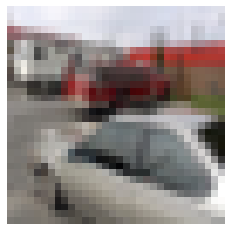

In [ ]:
import matplotlib.pyplot as plt
image = X[-1]
plt.imshow(image) #в цвете
plt.gca().axis('off'); #таким кодом можно убрать координатные оси

In [ ]:
image.shape

(32, 32, 3)

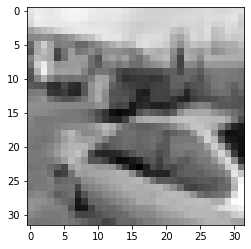

In [ ]:
plt.imshow(image[..., 0], cmap='gray')
#plt.gca().axis('off');

Условимся называть **индексом** то, что перечисляется через запятую в квадратных скобках.

Например, в выражении **X[A]** один индекс, **X[A, B, C]** три индекса.

--------------

Индекс **A:B** означает взятие подмассива от А включительно до B невключительно.

Например: **X[1:2]** означает взятие от 1-го до 2-го (не включительно) элемента массива X - то есть всего одного элемента по данной оси. *В отличие от индексации числом, в данном случае ось сохраняется*:

*   **X[1:2]** имеет форму **(1, 32, 32, 3)**
*   **X[1]** имеет форму **(32, 32, 3)**

В записи A:B можно пропустить одно из чисел или оба сразу, либо написать вместо них None (что то же самое):

*   **X[:5]** означает взятие всех элементов до 5-го, результат имеет форму **(5, 32, 32, 3)**
*   **X[-5:]** означает взятие всех элементов от -5-го, то есть 5 последних элементов, результат имеет форму **(5, 32, 32, 3)**
*   **X[:]** означает взятие всех элементов, результат имеет форму **(50000, 32, 32, 3)**

Пример: пусть у нас есть массив чисел **array**, и нам нужно посчитать приращения, то есть разницу между соседними значениями. Для этого:

1. Берем подмассив **array[1:]** - все числа кроме нулевого
2. Берем подмассив **array[:-1]** - все числа кроме последнего
3. Вычитаем первый массив из второго

In [ ]:
array = np.arange(20, step=2)
print(array)

[ 0  2  4  6  8 10 12 14 16 18]


In [ ]:
deltas = array[1:] - array[:-1]
print(deltas)

[2 2 2 2 2 2 2 2 2]


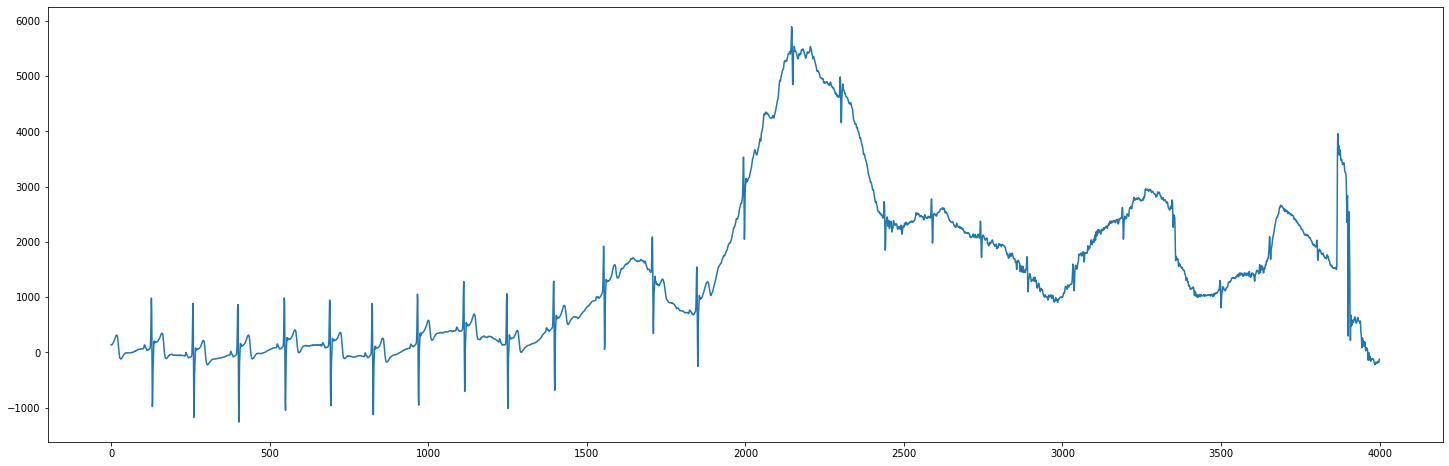

In [ ]:
!gsutil -q cp gs://oleg-zyablov/skillfactory/webinars/timeseries.npy timeseries.npy
array = np.load('timeseries.npy')

plt.figure(figsize=(25, 8))
plt.plot(array)
plt.show()

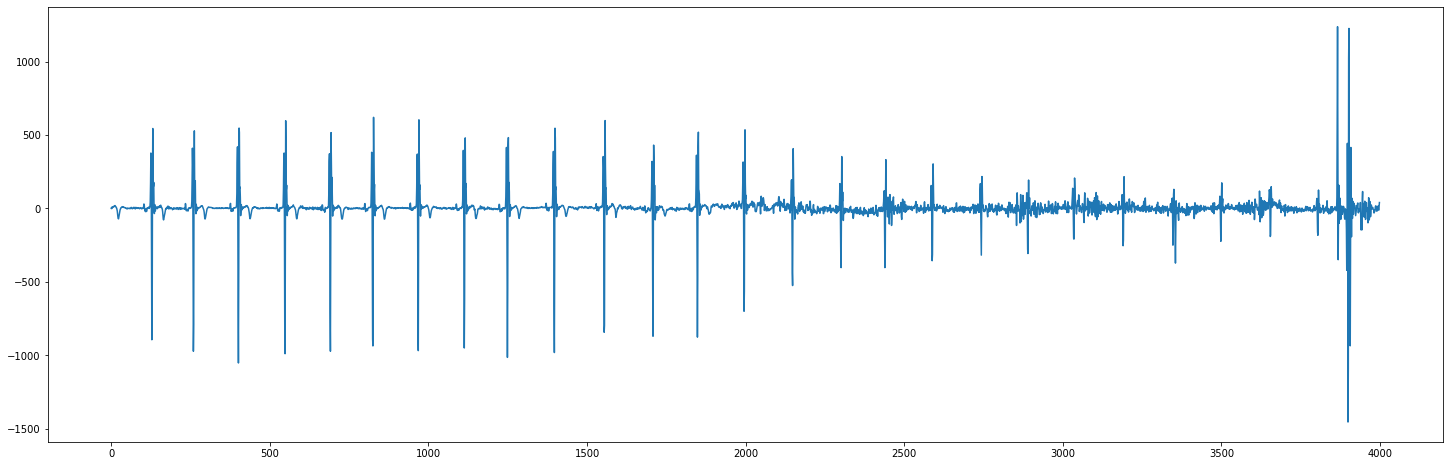

In [ ]:
plt.figure(figsize=(25, 8))
plt.plot(array[1:] - array[:-1])
plt.show()

Индекс **A:B:C** означает взятие подмассива от А включительно до B невключительно с шагом C, который может быть отрицательным. Некоторые значения (A, B или C) могут отсутствовать.

*   **X[::-1]** означает взятие элементов с шагом -1, то есть разворот массива задом наперед.
*   **X[::2]** означает взятие каждого второго элемента массива, начиная с нулевого, то есть всех элементов с четными индексами.
*   **X[1::2]** означает взятие каждого второго элемента массива, начиная с первого, то есть всех элементов с нечетными индексами.
*   **X[::]** - то же самое, что **X[:]** или просто **X**.

In [ ]:
array = np.arange(10)
print(array)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
array[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [ ]:
array[0::2]

array([0, 2, 4, 6, 8])

In [ ]:
array[1::2]

array([1, 3, 5, 7, 9])

Двоеточие (одинарное или двойное) является объектом slice. Его можно создать явно:

In [ ]:
my_slice = slice(None, None, -1)
array[my_slice] #то же что array[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

# Индексация массивом и другие способы

Кроме чисел и срезов в качестве индекса можно использовать массивы.

Пусть **X** - массив изображений размером **(50000, 32, 32, 3)**.

Если мы хотим взять 1-й, 3-й и 5-й элемент массива, то по нулевой оси нужно взять индексы 1, 3, 5.

Для этого в качестве индекса подставляется массив **[1, 3, 5]**.

Результатом будет массив формы **(3, 32, 32, 3)**, поскольку по нулевой оси мы взяли 3 элемента.

In [ ]:
indices = [1, 3, 5]
X[indices].shape

(3, 32, 32, 3)

In [ ]:
X[[1, 3, 5]].shape

(3, 32, 32, 3)

В качестве индекса можно также подставлять массив логических значений True/False.

По оси будут взяты только те элементы, для которых указано True. Пример:

In [ ]:
arr = np.array([1, 7, -2, 6, 5]) #некий массив
indices = [True, False, True, False, True] #индексы
arr[indices]

array([ 1, -2,  5])

Индексация массивом используется при делении набора данных на выборки. Мы рассмотрим это в следующей части.

Индексация числом или срезом создает "view" для массива, то есть его изменение повлечет изменение исходного массива.

[Подробнее здесь](https://scipy-cookbook.readthedocs.io/items/ViewsVsCopies.html).

In [ ]:
X = np.zeros((2, 2))
X_slice = X[:1, :1]
X_slice[0][0] = 1
X

array([[1., 0.],
       [0., 0.]])

Можно добавить новую ось, передав в качестве индекса **np.newaxis** (или **None**, что то же самое).

In [ ]:
(X, y), _ = keras.datasets.mnist.load_data()
X.shape

(60000, 28, 28)

In [ ]:
X[:, :, :, np.newaxis].shape #добавили ось, означающую цветовой канал

(60000, 28, 28, 1)

In [ ]:
X[..., None].shape #аналогично предыдущему коду

(60000, 28, 28, 1)

В добавленной оси будет доступен только нулевой индекс, потому что размер этой оси - единица.

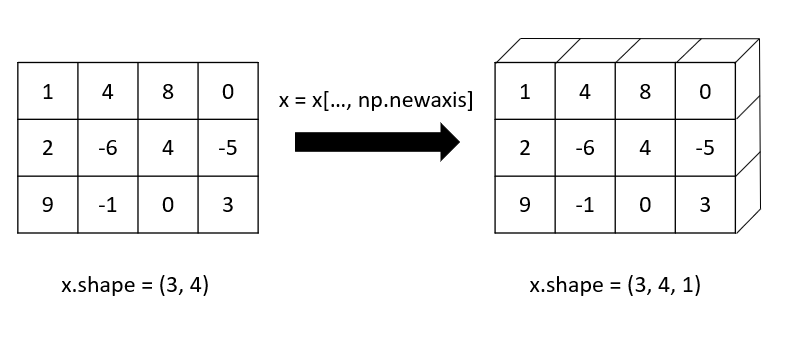

In [ ]:
#@title Повторим что можно подставлять в качестве индекса

%%html
<style>
    p, table {
        font-size: 18px;
    }
</style>

<table width="50%" border=1>

<tr>
<th width="50%" style="text-align:left">Способ индексирования</th>
<th width="50%" style="text-align:left">Примеры</th>
</tr>

<tr>
<td>Число</td>
<td>X[0]<br/>X[-1]</td>
</tr>

<tr>
<td>Срез</td>
<td>X[:, -5:]<br/>X[::-1]<br/>X[slice(10, 20, 2)]</td>
</tr>

<tr>
<td>Массив числовых индексов</td>
<td>X[[1, 3, 5]]</td>
</tr>

<tr>
<td>Массив boolean-индексов</td>
<td>X[[True, False, True, False]]</td>
</tr>

<tr>
<td>Многоточие (ellipsis)</td>
<td>X[..., 0]</td>
</tr>

<tr>
<td>Новая ось (np.neaxis или None)</td>
<td>X[np.newaxis, ...]<br/>X[None, ...]</td>
</tr>

</table>

# Конкатенация массивов

Конкатенация (**np.concatenate**) - это операция "склейки" двух или более массивов по заданной оси. При этом размер массивов по остальным осям должен совпадать. Пример: 

```
Форма первого массива: (64, 100, 25, 3)
Форма второго массива: (64, 50,  25, 3)
Форма результата:      (64, 150, 25, 3)
```

In [ ]:
array1 = np.zeros((64, 100, 25, 3))
array2 = np.zeros((64, 50, 25, 3))

result = np.concatenate([array1, array2], axis=1)
result.shape

(64, 150, 25, 3)

Еще одна похожая операция - np.stack. Эта операция сначала создает новую ось, а затем склеивает массивы по созданной оси. Размеры всех массивов должны совпадать.

```
Форма массива arr1: (32, 32, 4)
Форма массива arr2: (32, 32, 4)
Форма массива arr3: (32, 32, 4)

Делаем stack по нулевой оси, то есть добавим новую ось на позиции 0:
np.stack([arr1, arr2, arr3], axis=0)

Форма результата: (3, 32, 32, 4)
```

Главная разница в следующем:
*   **np.stack создает новую ось и склеивает по ней**
*   **np.concatenate склеивает по уже существующей оси**

Например, пусть у нас есть 60 тысяч изображений из датасета MNIST:

In [ ]:
(X, y), _ = keras.datasets.mnist.load_data()
X.shape

(60000, 28, 28)

Мы хотим преобразовать их в формат RGB. В этом формате изображение имеет 3 цветовых канала: красный, зеленый, синий. Если при этом изображение черно-белое, то значения каждого пикселя во всех трех каналах должны совпадать, например:

```
R=0, G=0, B=0        - черный цвет
R=128, G=128, B=128  - серый цвет
R=255, G=255, B=255  - белый цвет
```

Это значит, что нам нужно превратить массив размера (60000, 28, 28) в массив размера (60000, 28, 28, 3).

Это можно сделать с помощью **`np.stack`**:

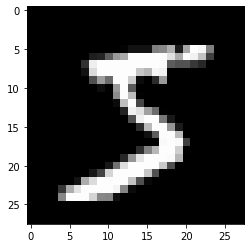

In [ ]:
X_rgb = np.stack([X]*3, axis=-1) #добавляем ось с конца

plt.imshow(X_rgb[0]);

In [ ]:
X_rgb.shape

(60000, 28, 28, 3)

Или с помощью **`np.concatenate`**:

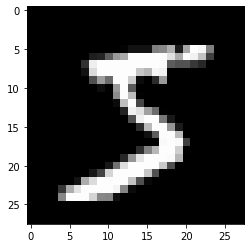

In [ ]:
X_with_newaxis = X[..., np.newaxis] #имеет форму (60000, 28, 28, 1)
X_rgb = np.concatenate([X_with_newaxis]*3, axis=-1)

plt.imshow(X_rgb[0]);

# Операции delete, moveaxis, reshape

**`np.delete`** - удаляет указанные элементы по указанной оси. Например, удалим 3 изображения из массива:

In [ ]:
np.delete(X, [1, 3, 5], axis=0).shape

(59997, 28, 28)

При этом исходный массив X не изменился, операция np.delete создала **копию** массива и удалила из нее указанные элементы.

**`np.moveaxis`** - меняет местами указанные оси. Например, переведем массив изображений из формата channels_last в формат channels_first:

In [ ]:
(X, y), _ = keras.datasets.cifar10.load_data()
print(X.shape)

X2 = np.moveaxis(X, 3, 1)
print(X2.shape)

(50000, 32, 32, 3)
(50000, 3, 32, 32)


Операция транспонирования (**.T**) работает для двумерных массивов и меняет местами оси:

In [ ]:
arr = np.ones((1, 10))
arr.shape

(1, 10)

In [ ]:
arr.T.shape

(10, 1)

Операция reshape меняет форму массива, то есть данные в памяти интерпретируются как массив другой формы.

Пример: изображение 32х32х3 можно представить как вектор чисел длиной 3072. Некоторые алгоритмы машинного обучения работают только с векторами, поэтому преобразуем каждое изображение в вектор:

In [ ]:
print(X.shape)

#операция "flatten"
X_flat = X.reshape(50000, 32*32*3)
print(X_flat.shape)

(50000, 32, 32, 3)
(50000, 3072)


Количество элементов в массиве при операции reshape не меняется.

В **`reshape`** можно подставить -1, чтобы numpy определил требуемый размер самостоятельно:

In [ ]:
X_flat = X.reshape(len(X), -1) #аналогично коду выше
print(X_flat.shape)

(50000, 3072)


# Сохранение и загрузка массивов

**`np.save(filename, array)`** - сохранение массива в файл.

Если файл не заканчивается расширением .npy, то оно будет дописано в имя файла.

**`array = np.load(filename)`** - загрузка массива из файла.

In [ ]:
np.save('file.npy', X)

In [ ]:
!ls -la

total 150052
drwxr-xr-x 1 root root      4096 Feb 28 12:31 .
drwxr-xr-x 1 root root      4096 Feb 28 11:35 ..
drwxr-xr-x 4 root root      4096 Feb 24 17:48 .config
-rw-r--r-- 1 root root 153600128 Feb 28 12:31 file.npy
drwxr-xr-x 1 root root      4096 Feb 24 17:49 sample_data
-rw-r--r-- 1 root root     32128 Feb 28 12:14 timeseries.npy
